# 🧪 Lab 5: Decision Trees and Random Forests in Business Finance

**Course**: Introduction to Machine Learning  
**Instructor**: Ross  
**Objective**: Learn how to build interpretable models using decision trees and improve performance with random forests.

In this lab, you'll predict whether a small business loan should be approved based on financial indicators. We'll use decision trees to understand how features influence predictions, and random forests to improve accuracy.

You'll learn to:
- Train and visualize decision trees
- Understand overfitting and tree depth
- Use random forests for ensemble learning
- Evaluate models using accuracy and confusion matrices

In [1]:
# 📦 Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## 💼 Step 2: Simulate small business financial data
We'll generate synthetic data for 1000 businesses, including annual revenue, years in business, credit score, industry, and province. The target variable is whether their loan was approved.

In [3]:
# Simulate dataset
np.random.seed(42)
n = 1000
df = pd.DataFrame({
    'Annual_Revenue': np.random.normal(500000, 200000, size=n).astype(int),
    'Years_in_Business': np.random.randint(1, 25, size=n),
    'Credit_Score': np.random.randint(40, 100, size=n),
    'Industry': np.random.choice(['Retail', 'Tech', 'Manufacturing'], size=n),
    'Province': np.random.choice(['ON', 'BC', 'QC'], size=n),
    'Loan_Approved': np.random.choice([0, 1], size=n, p=[0.4, 0.6])
})
df.head()

,Annual_Revenue,Years_in_Business,Credit_Score,Industry,Province,Loan_Approved
0,599342,23,57,Tech,BC,1
1,472347,12,91,Manufacturing,ON,0
2,629537,17,88,Manufacturing,BC,1
3,804605,8,98,Tech,QC,0
4,453169,11,67,Tech,QC,1


## 🧹 Step 3: Preprocess the data
We'll convert categorical variables into numeric format using one-hot encoding and split the data into training and test sets.

In [5]:
# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=['Industry', 'Province'], drop_first=True)

# Define features and target
X = df_encoded.drop('Loan_Approved', axis=1)
y = df_encoded['Loan_Approved']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df_encoded.head()

,Annual_Revenue,Years_in_Business,Credit_Score,Loan_Approved,Industry_Retail,Industry_Tech,Province_ON,Province_QC
0,599342,23,57,1,False,True,False,False
1,472347,12,91,0,False,False,True,False
2,629537,17,88,1,False,False,False,False
3,804605,8,98,0,False,True,False,True
4,453169,11,67,1,False,True,False,True


## 🌳 Step 4: Train a Decision Tree Classifier
We'll start with a simple decision tree and visualize its structure to understand how it makes decisions.

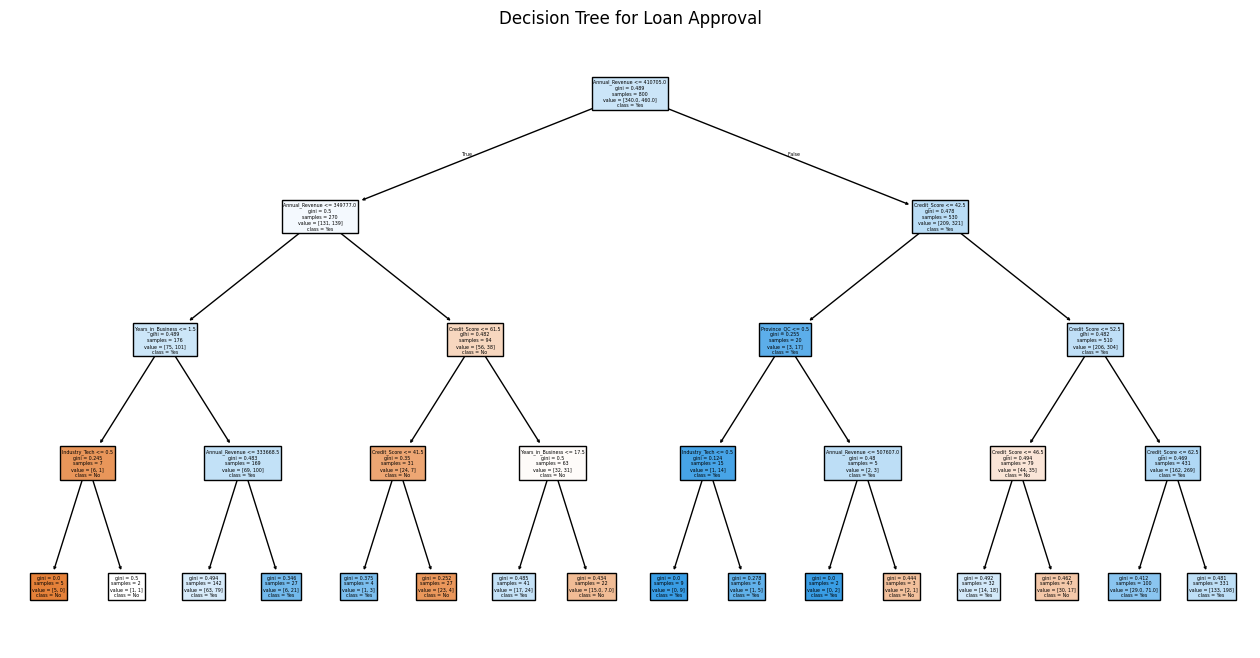

In [6]:
# Train decision tree
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

# Visualize tree
plt.figure(figsize=(16, 8))
plot_tree(tree_model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree for Loan Approval")
plt.show()

## 📊 Step 5: Evaluate Decision Tree
We'll check accuracy and view the confusion matrix to understand performance.

Decision Tree Accuracy: 0.515

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.15      0.22        94
           1       0.53      0.84      0.65       106

    accuracy                           0.52       200
   macro avg       0.49      0.49      0.44       200
weighted avg       0.49      0.52      0.45       200



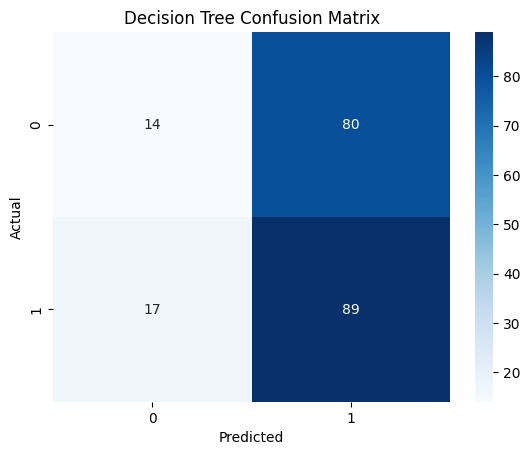

In [7]:
# Predict and evaluate
y_pred_tree = tree_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 🌲 Step 6: Train a Random Forest Classifier
Random forests combine multiple decision trees to reduce overfitting and improve accuracy.

In [8]:
# Train random forest
forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_forest = forest_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))
print("\nClassification Report:\n", classification_report(y_test, y_pred_forest))

Random Forest Accuracy: 0.51

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.32      0.38        94
           1       0.53      0.68      0.60       106

    accuracy                           0.51       200
   macro avg       0.50      0.50      0.49       200
weighted avg       0.50      0.51      0.49       200



## 📈 Step 7: Feature Importance
Random forests can tell us which features are most important for prediction.

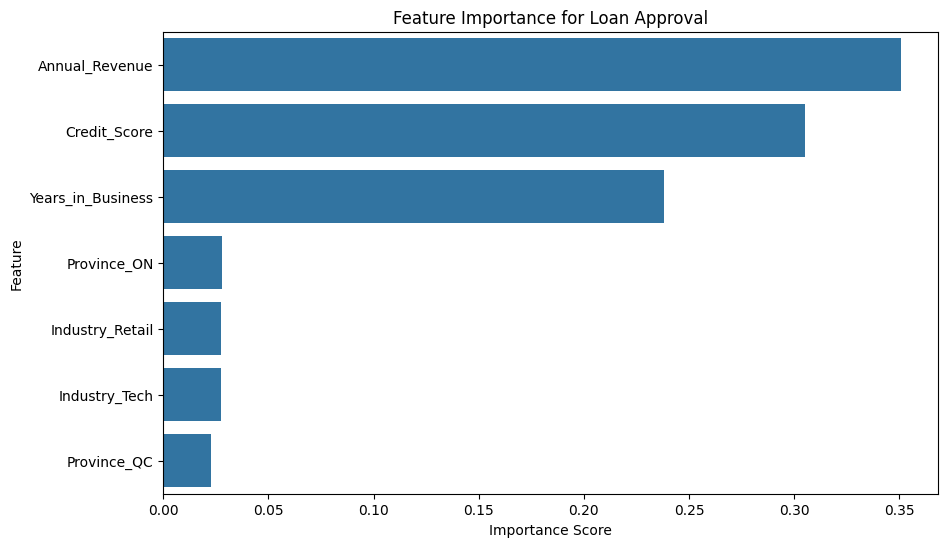

In [9]:
# Plot feature importance
importances = forest_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importance for Loan Approval")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

## 📝 Reflection Questions

1. Which financial features were most predictive of loan approval?
2. How does tree depth affect interpretability vs. accuracy?
3. Why might a bank prefer random forests over a single decision tree?
4. How could this model be biased, and how would you mitigate that?